# APIs

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA

# UDFs

In [25]:
# function for a scatter plot with labels
def plot_scatter(X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    for label, marker, color in zip(np.unique(y), ['o', '^'], ['r', 'b']):
        ax.scatter(X[y==label, 0], X[y==label, 1], marker=marker, c=color, edgecolors='black', s=40, label=f'Class {label}')

# Preprocessing

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [3]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)
X_train_scaled = mmscaler.transform(X_train)

In [5]:
print(f'Min and Max values for each feature after scaling')
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

Min and Max values for each feature after scaling
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Applying transform on X_test and checking values

In [6]:
X_test_scaled = mmscaler.transform(X_test)
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


# PCA

## Visualizing features

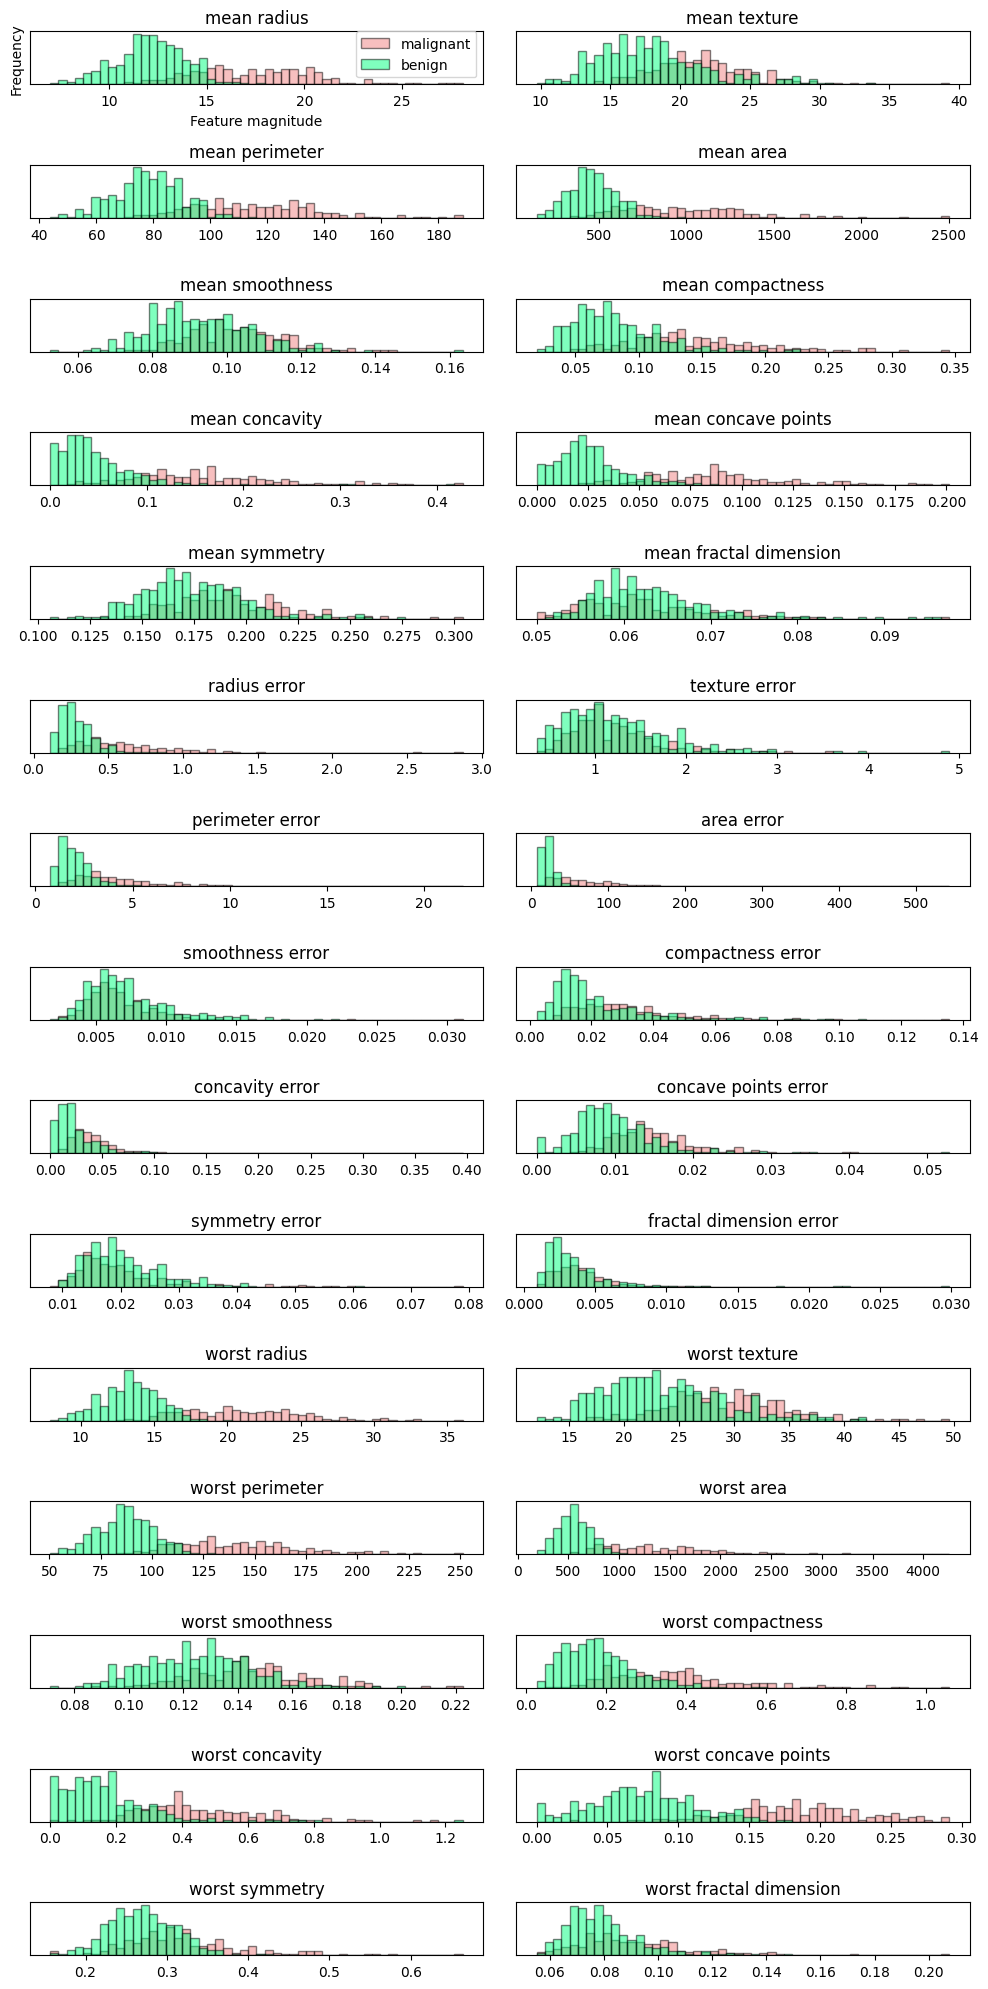

In [14]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='lightcoral', alpha=0.5, edgecolor='black')
    ax[i].hist(benign[:, i], bins=bins, color='springgreen', alpha=0.5, edgecolor='black')
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()


## Applying StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

## Applying PCA

In [18]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [19]:
X_pca = pca.transform(X_scaled)
print(f'Original shape: {X_scaled.shape}')
print(f'Reduced shape: {X_pca.shape}')

Original shape: (569, 30)
Reduced shape: (569, 2)


## Plotting principal components

### PC Plot

Text(0, 0.5, 'second PC')

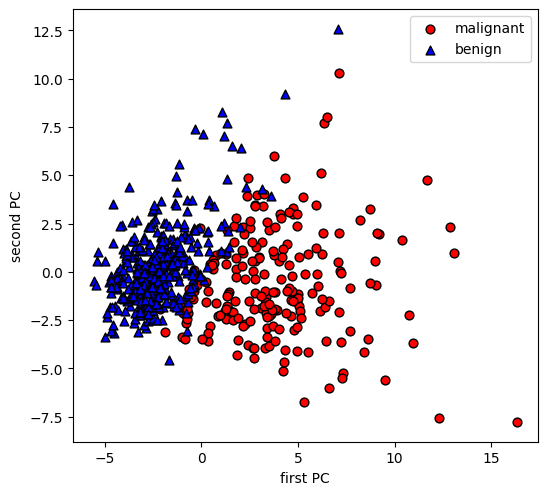

In [26]:
plt.figure(figsize=(6,6))
plot_scatter(X_pca, cancer.target)
plt.legend(cancer.target_names)
plt.gca().set_aspect('equal')
plt.xlabel('first PC')
plt.ylabel('second PC')


In [27]:
print(f'principal component shape: {pca.components_.shape}')

principal component shape: (2, 30)


In [28]:
print(f'Principal Components:\n{pca.components_}')

Principal Components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


### Visualizing component loadings

Text(0, 0.5, 'Principal components')

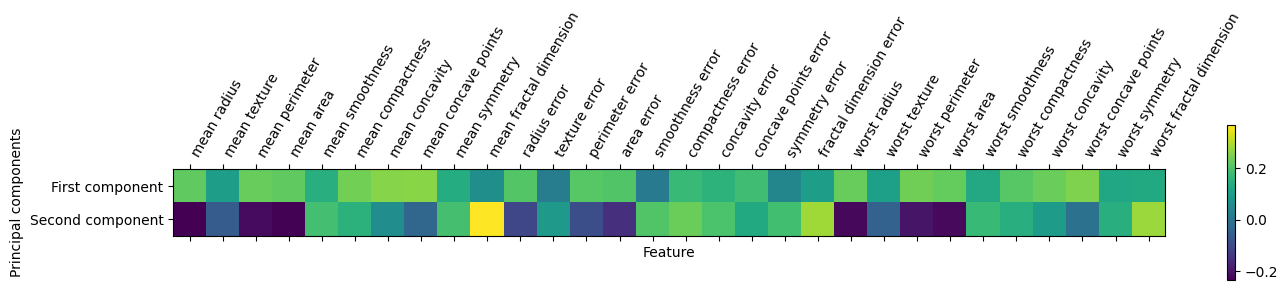

In [36]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')